# **Test Case 1**: Correlations from MD
On how to compute **correlations from molecular dynamics (MD) simulations**, applied to Protein Tyrosine Phosphatase A from Mycobacterium Tubercolosis (**MptpA)**

## Import MDiGest packages

In [ ]:
# import source code
import mdigest
# import parsetrajectory module
from mdigest.core.parsetrajectory import *

# import correlation modules
from mdigest.core.correlation import *
from mdigest.core.dcorrelation import *
from mdigest.core.kscorrelation import *

# import auxiliary functions module
import mdigest.core.auxiliary as aux

# import plots module
from mdigest.core.plots.general_plots import *
from mdigest.core.plots.plot_correlation import *

# import imports module
from mdigest.core.imports import *

# import save_data module
import mdigest.core.savedata as sd

import warnings
from importlib import reload
warnings.filterwarnings("ignore")

In [ ]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# For visualization
from pymol import cmd
#import nglview as nv
import ipywidgets as widgets
plt.rcParams.update({'font.size': 30})

## Compute Correlations

### Set paths

In [19]:
# Download the trajectories at the following link:
# "https://drive.google.com/drive/folders/102mgn-bvH3GazRoMTlNqaEN6tilUJqZw?usp=sharing"
# define trajectory and topology files

# change path accordingly: this is the path to the trajectories
parent = '/Volumes/GoogleDrive-112881197181043313538/Shared drives/PUBLIC/MptpA/'

# change path accordingly: assign this path to be the folder where you want your results to be saved.
currdir = '/Users/federica/Downloads/'

# define trajectory files
topology_WT     = parent + 'dry_1U2P.psf'
topology_Q75L   = parent + 'dry_1U2P_Q75L.psf'
trajectory_WT   = [ parent + 'dry_1U2P_2_200ns.dcd', parent + 'dry_1U2P_3_200ns.dcd', parent + 'dry_1U2P_4_200ns.dcd']
trajectory_Q75L = [ parent + 'dry_1U2P_Q75L_2_200ns.dcd', parent + 'dry_1U2P_Q75L_3_200ns.dcd', parent + 'dry_1U2P_Q75L_4_200ns.dcd']

# define path to output folder 
savedir = currdir + '/mdigest-RESULTS/'
# create savedir if not there
mdigest.core.toolkit.folder_exists(savedir)

In [5]:
mdsWT = MDS()
# set number of replicas
mdsWT.set_num_replicas(1) # use 2 if you have 2 replicas.
# load topology and trajectory files into MDS class
mdsWT.load_system(topology_WT, trajectory_WT)
# align trajectory
mdsWT.align_traj(inMemory=True, selection='name CA')
# set selections for MDS class
mdsWT.set_selection('protein and name CA', 'protein')
# stride trajectory
mdsWT.stride_trajectory(initial=0, final=-1, step=5)

  0%|          | 0/15000 [00:00<?, ?it/s]

@>: number of frames:      15000
@>: number of replicas:    1
@>: using window length of 3000 simulation steps
@>: number or frames per replica: 3000
@>: first frame:           0
@>: last frame:            15000
@>: step:                  5
@>: number of residues in selected atom group: 163
@>: number of nodes    in selected atom group: 163
@>: number of elements in selected atom group: 163


In [6]:
# parse Q75L trajectory
mdsQ75L = MDS()
# set number of replicas
mdsQ75L.set_num_replicas(1) # use 2 if you have 2 replicas.
# load topology and trajectory files into MDS class
mdsQ75L.load_system(topology_Q75L, trajectory_Q75L)
# align trajectory
mdsQ75L.align_traj(inMemory=True, selection='name CA')
# set selections for MDS class
mdsQ75L.set_selection('protein and name CA', 'protein')
# stride trajectory
mdsQ75L.stride_trajectory(initial=0, final=-1, step=5)


  0%|          | 0/15000 [00:00<?, ?it/s]

@>: number of frames:      15000
@>: number of replicas:    1
@>: using window length of 3000 simulation steps
@>: number or frames per replica: 3000
@>: first frame:           0
@>: last frame:            15000
@>: step:                  5
@>: number of residues in selected atom group: 163
@>: number of nodes    in selected atom group: 163
@>: number of elements in selected atom group: 163


The verbose printing informs on the option selected for trajectory parsing.
The MDS class conveniently stores different MDAnalysis attributes that can be accessed, as shown below

The MDS class conveniently stores different MDAnalysis attributes that can be accessed as follows

In [ ]:
# check selected atomgroup
# print('----@>: Atom Group:\n', mds.atom_group_selection)
# print('----@>: Dictionary for converting between atom ids and residue ids (resids)\n', mds.nodes_to_res_dictionary)
# print('----@>: Number of atoms\n', mds.natoms)
# print('----@>: Number of nodes\n', mds.nnodes)
# print('----@>: Number of residues\n', mds.nresidues)


In [7]:
%%time
# compute correlation from CA displacements for the WT trajectory
dyncorrWT = DynCorr(mdsWT)
dyncorrWT.parse_dynamics(scale=True, normalize=True, LMI='gaussian', MI='None', DCC=True, PCC=True, VERBOSE=True, COV_DISP=True)
# use MI=knn_5_2 to compute generalized based correlation of CA displacements

@>: sanity check pass: number of residues is same as number of nodes
@>: using window length of 3000 simulation steps
@> -- shape of coordinates matrix: (1, 3000, 163, 3)
@> -- shape of coordinates_allreplicas matrix: (1, 3000, 489)
@> -- shape of displacements_allreplicas matrix: (1, 3000, 489)
@> -- shape of disp_from_mean_allreplicas matrix: (1, 3000, 163)
@> -- shape of distances_allreplicas matrix: (1, 163, 163)
@> -- shape of covar_disp_allreplicas (1, 163, 163)
@> -- shape of dcc_allreplicas matrix: (1, 163, 163)
@> -- shape of pcc_allreplicas matrix: (1, 163, 163)


@>: LMI/MI calculation ...
@>: begin frame: 0
@>: end   frame: 15000
@>: step:        5
@>: compute covariance of displacements...
@>: reshaping coordinates...
@>: values array has shape (3000, 163, 3)


100%|██████████| 13366/13366 [00:03<00:00, 3832.41it/s]


@>: computing eigenvector centrality from lmi matrix
@>: computing and storing distances...
@>: computing normalized dynamical cross-correlation matrix
@>: computing pearson correlation matrix
CPU times: user 8.59 s, sys: 847 ms, total: 9.44 s
Wall time: 7.58 s


In [9]:
%%time
# compute correlation from CA displacements for the Q75L trajectorie
dyncorrQ75L = DynCorr(mdsQ75L)
dyncorrQ75L.parse_dynamics(scale=True, normalize=True, LMI='gaussian', MI=None, DCC=True, PCC=True, VERBOSE=True, COV_DISP=True) # use MI='knn_5_2' to compute MI
# use MI=knn_5_2 to compute generalized based correlation of CA displacements

@>: sanity check pass: number of residues is same as number of nodes
@>: using window length of 3000 simulation steps
@> -- shape of coordinates matrix: (1, 3000, 163, 3)
@> -- shape of coordinates_allreplicas matrix: (1, 3000, 489)
@> -- shape of displacements_allreplicas matrix: (1, 3000, 489)
@> -- shape of disp_from_mean_allreplicas matrix: (1, 3000, 163)
@> -- shape of distances_allreplicas matrix: (1, 163, 163)
@> -- shape of covar_disp_allreplicas (1, 163, 163)
@> -- shape of dcc_allreplicas matrix: (1, 163, 163)
@> -- shape of pcc_allreplicas matrix: (1, 163, 163)


@>: LMI/MI calculation ...
@>: begin frame: 0
@>: end   frame: 15000
@>: step:        5
@>: compute covariance of displacements...
@>: reshaping coordinates...
@>: values array has shape (3000, 163, 3)


100%|██████████| 13366/13366 [00:03<00:00, 3888.14it/s]


@>: computing eigenvector centrality from lmi matrix
@>: computing and storing distances...
@>: computing normalized dynamical cross-correlation matrix
@>: computing pearson correlation matrix
CPU times: user 7.55 s, sys: 414 ms, total: 7.96 s
Wall time: 5.32 s


In [10]:
%%time
# Kabsch-Sander analysis for correlation of electrostatic interactions in WT
KSWT = KS_Energy(mdsWT)
# select backbone atoms
KSWT.set_selection(['protein and backbone and name N','protein and backbone and name O',
                  'protein and backbone and name C','protein and name H'], system_selstr='protein')
# set indices according to atom name selection
KSWT.set_backbone_dictionary({'N-Backbone':'N',
                             'O-Backbone':'O',
                             'C-Backbone':'C',
                             'CA-Backbone':'CA',
                             'H-Backbone':'H'})

KSWT.KS_pipeline(topology_charges=False, MI=None, covariance=True, correction=True) # use MI='knn_5_2' to include MI
KSWT.compute_EEC(distance_matrix=None, loc_factor=None, don_acc=True)

@>: prepare kabsch sanders calculation
@>: run KS calculation


@>: KS energy calculation ...
@>: begin frame: 0
@>: end   frame: 15000
@>: step:        5
@>: computing distances in parallel


  0%|          | 0/3000 [00:00<?, ?it/s]

@>: values array has shape (3000, 163)
@>: values array has shape (3000, 163)
@>: values array has shape (3000, 163)


CPU times: user 7.88 s, sys: 1.23 s, total: 9.11 s
Wall time: 7.84 s


In [11]:
%%time
# Kabsch-Sander analysis for correlation of electrostatic interactions in Q75L
KSQ75L = KS_Energy(mdsQ75L)
# select backbone atoms
KSQ75L.set_selection(['protein and backbone and name N','protein and backbone and name O',
                  'protein and backbone and name C','protein and name H'], system_selstr='protein')
# set indices according to atom name selection
KSQ75L.set_backbone_dictionary({'N-Backbone':'N',
                             'O-Backbone':'O',
                             'C-Backbone':'C',
                             'CA-Backbone':'CA',
                             'H-Backbone':'H'})

KSQ75L.KS_pipeline(topology_charges=False, MI=None, covariance=True, correction=True) # use MI='knn_5_2' to include MI
KSQ75L.compute_EEC(distance_matrix=None, loc_factor=None, don_acc=True)

@>: prepare kabsch sanders calculation
@>: run KS calculation


@>: KS energy calculation ...
@>: begin frame: 0
@>: end   frame: 15000
@>: step:        5
@>: computing distances in parallel


  0%|          | 0/3000 [00:00<?, ?it/s]

@>: values array has shape (3000, 163)
@>: values array has shape (3000, 163)
@>: values array has shape (3000, 163)


CPU times: user 9.25 s, sys: 2.28 s, total: 11.5 s
Wall time: 9.97 s


In [ ]:
%%time
# compute correlation from dihedral fluctuations for the WT trajectory
dihdyncorrWT = DihDynCorr(mdsWT)
dihdyncorrWT.parse_dih_dynamics(mean_center=True, LMI='gaussian', MI='knn_5_2', DCC=True, PCC=True, COV_DISP=True)

In [ ]:
# compute correlation from dihedral fluctuations for the Q75L trajectory
%%time
dihdyncorrQ75L = DihDynCorr(mdsQ75L)
dihdyncorrQ75L.parse_dih_dynamics(mean_center=True, LMI='gaussian', MI='knn_5_2', DCC=True, PCC=True, COV_DISP=True)

We save the instances of each correlation class with the save_class function.
Once stored, one can reload all attributes of the correlation analysis into a macro-object using MDSdata. 

In [20]:
cachedir = savedir + 'CACHE/'

# save WT objects to file for later use
dyncorrWT.save_class(file_name_root=cachedir + 'dyncorrWT')
KSWT.save_class(file_name_root=cachedir + 'KS_WT', save_space=True)
dihdyncorrWT.save_class(file_name_root=cachedir + 'dih_WT')


# save Q75L objects to file for later use
dyncorrQ75L.save_class(file_name_root=cachedir + 'dyncorrQ75L')
KSQ75L.save_class(file_name_root=cachedir + 'KS_Q75L', save_space=True)
dihdyncorrQ75L.save_class(file_name_root=cachedir + 'dih_Q75L')


## Correlation Analysis

In [29]:
# define path to output folder and cache
cachedir = savedir + 'CACHE/'
mdigest.core.toolkit.folder_exists(cachedir)
results_dir = savedir + 'RESULTS/MptpA/'
mdigest.core.toolkit.folder_exists(results_dir)
rd = results_dir

Load cached outputs

In [22]:
KSWT_load = sd.MDSdata()
KSWT_load.load_from_file(file_name_root=cachedir + 'KS_WT', save_space=True)

# # double  load trick to have all class attributes from both dyncorr and KS analysis in one

dyncorrWT_load = KSWT_load
dyncorrWT_load.load_from_file(file_name_root=cachedir + 'dyncorrWT')
dyncorrWT_load.load_from_file(file_name_root=cachedir + 'dih_WT')


@>: cached file found: loading  /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_WT_cache.hf
@>: is_proline int32 (163,) 163
    Done loading is_proline attribute
@>: is_protein int32 (163,) 163
    Done loading is_protein attribute
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_WT_nodes_to_res_dictionary.h5
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_WT_nodes_to_res_dictionary.h5
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_WT_DA_energies_allrep.h5
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_WT_DA_MI_corr_allrep.h5
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_WT_DA_LMI_corr_allrep.h5
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_WT_cov_allrep.h5
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_WT_eigvec_centrality_da_allrep.h5
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_WT_eigvec_centrality_don_allrep.h5
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACH

In [25]:
KSQ75L_load = sd.MDSdata()
KSQ75L_load.load_from_file(file_name_root=cachedir + 'KS_Q75L', save_space=True)

# # double  load trick to have all class attributes from both dyncorr and KS analysis in one

dyncorrQ75L_load = KSQ75L_load
dyncorrQ75L_load.load_from_file(file_name_root=cachedir + 'dyncorrQ75L')
dyncorrQ75L_load.load_from_file(file_name_root=cachedir + 'dih_Q75L')


@>: cached file found: loading  /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_Q75L_cache.hf
@>: is_proline int32 (163,) 163
    Done loading is_proline attribute
@>: is_protein int32 (163,) 163
    Done loading is_protein attribute
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_Q75L_nodes_to_res_dictionary.h5
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_Q75L_nodes_to_res_dictionary.h5
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_Q75L_DA_energies_allrep.h5
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_Q75L_DA_MI_corr_allrep.h5
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_Q75L_DA_LMI_corr_allrep.h5
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_Q75L_cov_allrep.h5
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_Q75L_eigvec_centrality_da_allrep.h5
@>: load /Users/federica/Downloads//mdigest-RESULTS/CACHE/KS_Q75L_eigvec_centrality_don_allrep.h5
@>: load /Users/federica/Downloads//md

Now that everything is loaded correctly we can finally do some analysis!

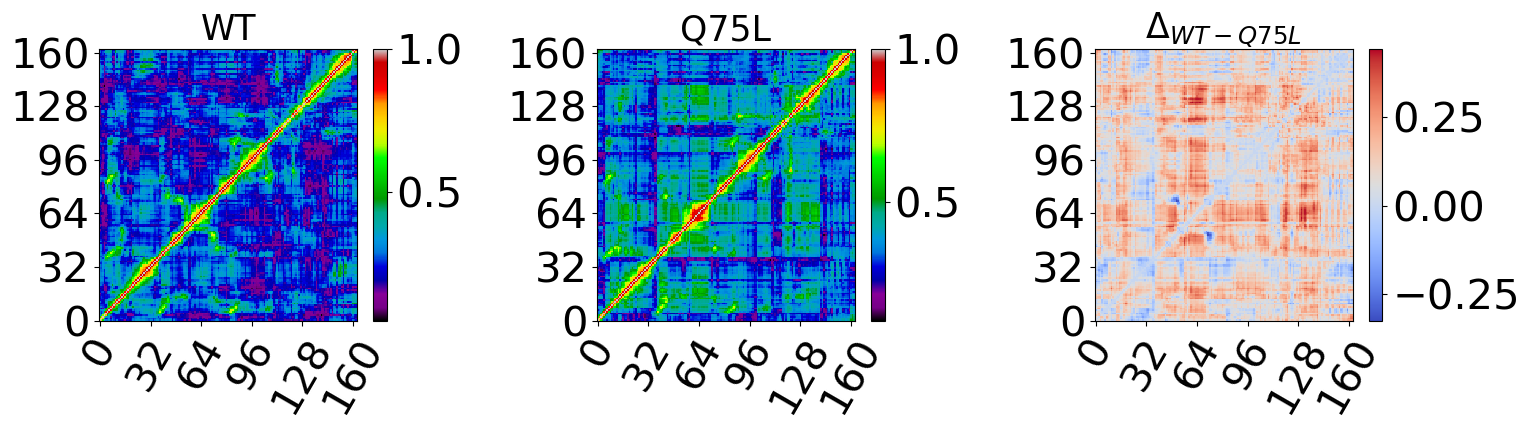

rep. 0
rep. = 0,  RED [ 57  61  64 122 131 133 134 138 141]
rep. = 0,  BLU [ 11  30  31  33  34  37 149 153 156]


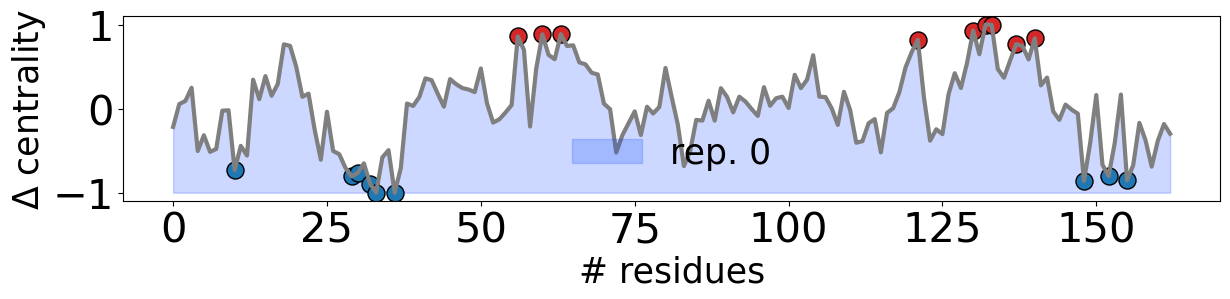

In [30]:
plots = Plots(dyncorrWT_load, dyncorrQ75L_load, matrix_type='gcc_lmi', save=rd + 'MptpA_ca_LMI')
plots.load_parameters({
            'fig': plt.subplots(1, 3, figsize=(16,5)),
            'labels': ['WT', 'Q75L']})
plots.plot_gcc_per_replica()

plots.load_parameters({
            'fig': plt.subplots(1+1,1, figsize=(13,6))})
plots.plot_eigcent_per_replica()


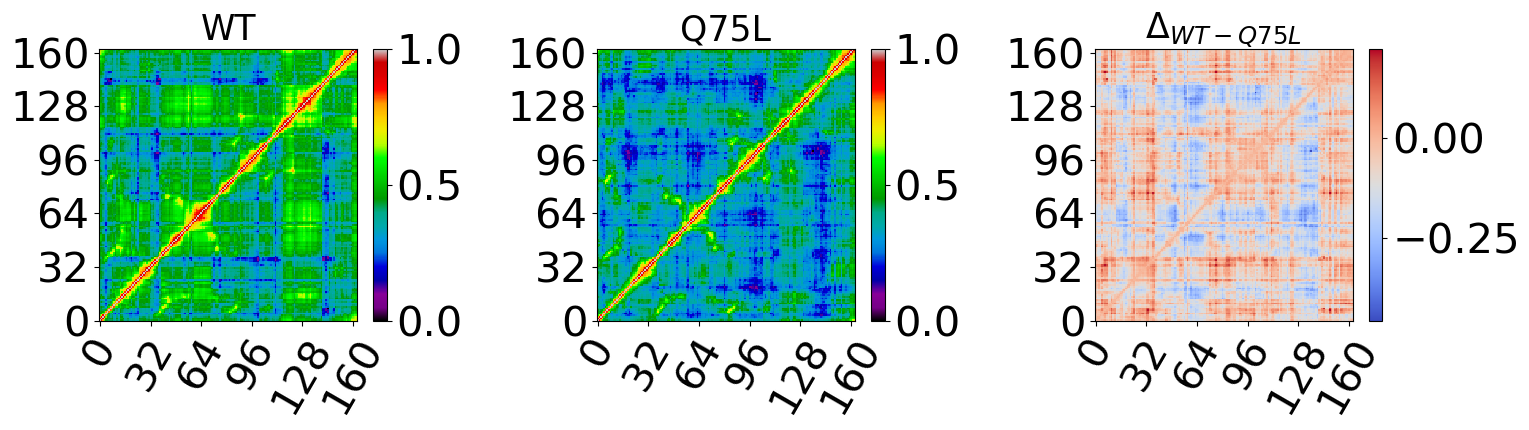

rep. 0
rep. = 0,  RED [ 11  25  33  34  37  38  84 149 153]
rep. = 0,  BLU [ 19  51  57  58  61  64 134 139 141]


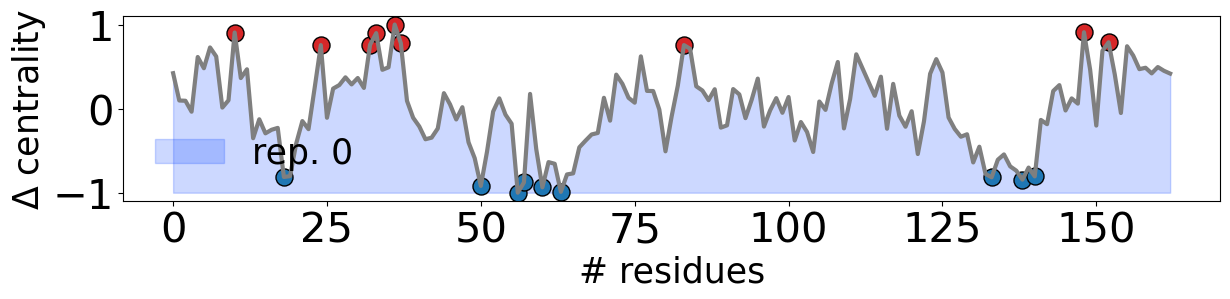

In [31]:
plots = Plots(dyncorrQ75L_load, dyncorrWT_load, matrix_type='gcc_mi', save=rd+'MptpA_ca_MI')
plots.load_parameters({
            'fig': plt.subplots(1, 3, figsize=(16,5)),
            'labels': ['WT', 'Q75L']})
plots.plot_gcc_per_replica()

plots.load_parameters({
            'fig': plt.subplots(1+1,1, figsize=(13,6))})
plots.plot_eigcent_per_replica()